In [1]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
import numpy as np
import math
from random import *

In [6]:
def create_coeffs():
    coeffs = list(range(-5, 6, 1))
    coeffs.remove(0)

    a = choice(coeffs)
    b = randint(-5, 5)
    c = randint(-5, 5)
    
    if b==c and b==min(coeffs):
        c+=1
    if b==c and b==max(coeffs):
        c-=1
        
    return {"a":a,
         "b":b,
         "c":c}

def f(x, coeffs):
    return coeffs["a"]*x**2+coeffs["b"]*x+coeffs["c"]

find_h = lambda a, b: -b/(2*a)
find_k = lambda h: f(h, coeffs)

def create_eq_str(coeffs):
    return r"$y=({a})x^2+({b})x+({c})$".format(**coeffs)

def create_hk_str(coeffs):
    h = find_h(coeffs["a"], coeffs["b"])
    k = find_k(h, coeffs)
    coeffs.update({"h":h, "k":k})
    
    return r"$y={a}(x-({h}))^2+({k})$".format(**coeffs)

{'a': -1, 'b': 4, 'c': -1}
$y=(-1)x^2+(4)x+(-1)$
$y=(-0.5)x^2+(4)x+(-3)$
$y=(0.25)x^2+(4)x+(-3)$
$y=(0.5)x^2+(4)x+(-2)$


(0, 0)

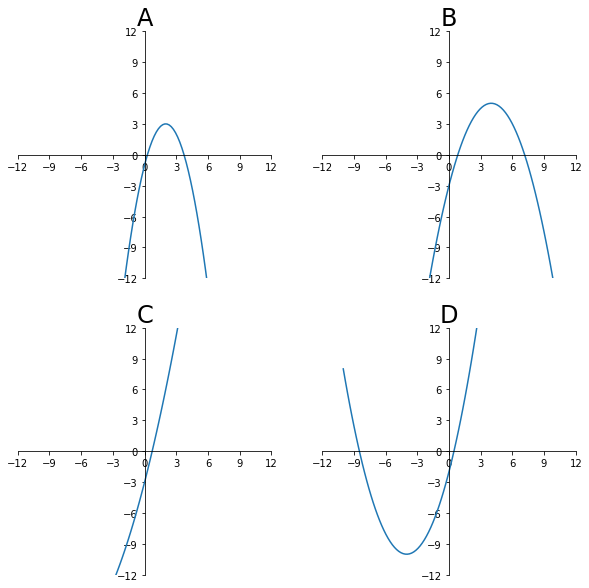

In [59]:

def format_plot_axes(ax):
    axes_map = {"left": "zero",
                "bottom":"zero",
                "right":"none",
                "top": "none"
    }

    ax.spines['left'].set_position(axes_map["left"])
    ax.spines['bottom'].set_position(axes_map["bottom"])
    ax.spines['right'].set_color(axes_map["right"])
    ax.spines['top'].set_color(axes_map["top"])
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    xmin, xmax = (-12, 12)
    ymin, ymax = (-12, 12)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# def add_label(ax):
    

def create_subplots(num_plots):
    sqrt = math.sqrt(num_plots)
    size = (10, 10)
    fig, axs = plt.subplots(int(sqrt), int(sqrt), figsize=size) 
    for row in axs:
        for ax in row:
            format_plot_axes(ax)
    return fig, axs


def create_parabola(x, coeffs, ax):
    ax.plot(x, f(x, coeffs))

def decide_correct():
    return (randint(0,1), randint(0,1)) 

def create_wrong(coeffs):    
    a_factor = choice([-1, -1/2, 1/2, 2])
    c_add_list = list(range(1, 3)) + list(range(-3, 1))
    c_add = choice(c_add_list)
    coeffs.update({"a":coeffs["a"]*a_factor, "c":coeffs["c"]+c_add})
    return coeffs

def create_full_grid(x, coeffs, axs):
    all_possible = [(0,0), (0, 1), (1, 0), (1, 1)]
    correct = decide_correct()
    
    create_parabola(x, coeffs, axs[correct[0]][correct[1]])
    
    for coord in all_possible:
        if coord != correct:
            r, c = coord
            create_parabola(x, create_wrong(coeffs), axs[r][c])
    
    titles = ["A", "B", "C", "D"]
    for i, coord in enumerate(all_possible):
        r, c = coord
        axs[r][c].set_title(titles[i], fontsize=24)
    
    return correct

fig, axs = create_subplots(4)
x = np.linspace(-10, 10, 100)
coeffs = create_coeffs()
print(coeffs)
create_full_grid(x, coeffs, axs)

In [7]:
x = np.linspace(-10, 10, 100)
coeffs = create_coeffs()
print(coeffs)
create_eq_str(coeffs)
f(x, coeffs)

{'a': -4, 'b': -3, 'c': 1}
$y=(-4)x^2+(-3)x+(1)$


array([-3.69000000e+02, -3.53607693e+02, -3.38541883e+02, -3.23802571e+02,
       -3.09389756e+02, -2.95303438e+02, -2.81543618e+02, -2.68110295e+02,
       -2.55003469e+02, -2.42223140e+02, -2.29769309e+02, -2.17641975e+02,
       -2.05841139e+02, -1.94366799e+02, -1.83218957e+02, -1.72397612e+02,
       -1.61902765e+02, -1.51734415e+02, -1.41892562e+02, -1.32377206e+02,
       -1.23188348e+02, -1.14325987e+02, -1.05790123e+02, -9.75807571e+01,
       -8.96978880e+01, -8.21415162e+01, -7.49116417e+01, -6.80082645e+01,
       -6.14313846e+01, -5.51810019e+01, -4.92571166e+01, -4.36597286e+01,
       -3.83888379e+01, -3.34444444e+01, -2.88265483e+01, -2.45351495e+01,
       -2.05702479e+01, -1.69318437e+01, -1.36199367e+01, -1.06345271e+01,
       -7.97561473e+00, -5.64319967e+00, -3.63728191e+00, -1.95786144e+00,
       -6.04938272e-01,  4.21487603e-01,  1.12141618e+00,  1.49484746e+00,
        1.54178145e+00,  1.26221814e+00,  6.56157535e-01, -2.76400367e-01,
       -1.53545557e+00, -

In [31]:
float_range = np.array([[i, i+.5] for i in range(1, 5)]).flatten()

In [32]:
float_range

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])